# Задание 2 (вариант 3)
Файл: `iris.csv`

# Подготовка данных
Для начала подготовим наши данные: добавим к каждой записи дополнительный атрибут `Sepal.Length*Sepal.Width`

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/iris.csv')
# Исходный датасет
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Добавим информацию о "площади"
df['Sepal.Area'] = df['Sepal.Length'] * df['Sepal.Width']
# Получили датасет с добавленной колонкой `Sepal.Length*Sepal.Width`
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00


In [4]:
# Сгруппируем записи по видам в отдельный датафрейм
groupedBySpecies = df.groupby('Species')

# И разделим главный датафрейм так, чтобы каждому виду соответствовал свой датафрейм:

# Множество всех видов
species = groupedBySpecies.groups.keys()
# Отображение: вид -> датафрейм с записями этого вида
dfPerSpecies = { sp : groupedBySpecies.get_group(sp) for sp in species }

# Среднее, дисперсия и медиана
Документация по используемым функциям (это скорее записи для себя):
- https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.var.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html

## Среднее

In [5]:
# 1.1) Выборочное среднее для всех видов
df['Sepal.Area'].mean()

17.822866666666663

In [6]:
# 1.2) Выборочное среднее для каждого вида
groupedBySpecies['Sepal.Area'].mean()

Species
setosa        17.2578
versicolor    16.5262
virginica     19.6846
Name: Sepal.Area, dtype: float64

## Дисперсия

In [7]:
# 2.1) Выборочная дисперсия для всех видов
df['Sepal.Area'].var()

11.302059512304252

In [8]:
# 2.2) Выборочная дисперсия для каждого вида
groupedBySpecies['Sepal.Area'].var()

Species
setosa         8.607034
versicolor     8.219012
virginica     11.963180
Name: Sepal.Area, dtype: float64

## Медиана

In [9]:
# 3.1) Выборочная медиана (все виды)
df['Sepal.Area'].median()

17.66

In [10]:
# 3.2) Выборочная медиана (каждый вид отдельно)
groupedBySpecies['Sepal.Area'].median()

Species
setosa        17.170
versicolor    16.385
virginica     20.060
Name: Sepal.Area, dtype: float64

# Графики

## Гистограмма

In [11]:
import matplotlib.pyplot as plt

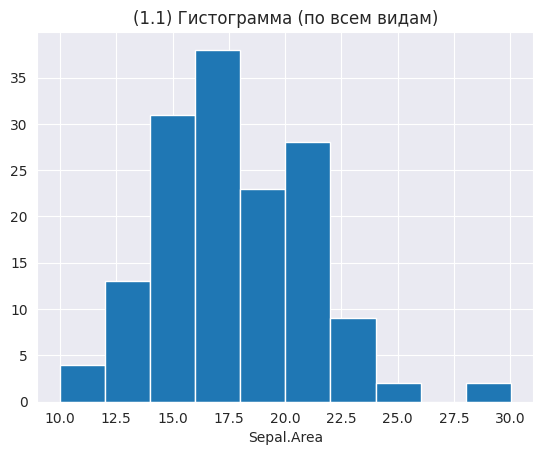

In [12]:
plt.hist(df['Sepal.Area'])
plt.title('(1.1) Гистограмма (по всем видам)')
plt.xlabel('Sepal.Area')
plt.show()

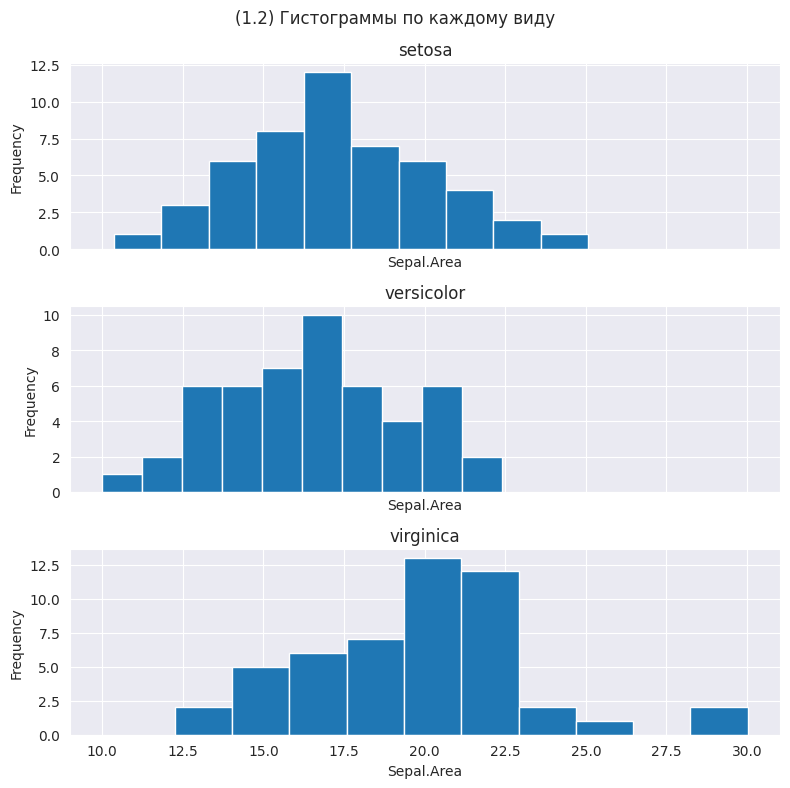

In [13]:
fig, axs = plt.subplots(len(species), figsize=(8,8), sharex=True)
fig.suptitle('(1.2) Гистограммы по каждому виду')
for ax, sp in zip(axs, species):
    ax.hist(dfPerSpecies[sp]['Sepal.Area'])
    ax.set_title(sp)
    ax.set_xlabel('Sepal.Area')
    ax.set_ylabel('Frequency')
fig.tight_layout()
plt.show()

## Boxplot

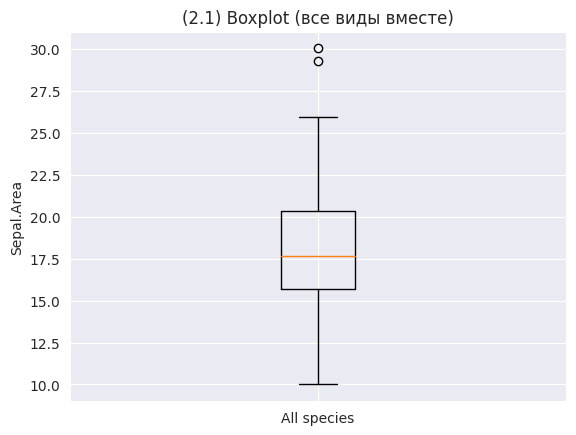

In [14]:
plt.boxplot(df['Sepal.Area'], labels=['All species'], vert=True)
plt.title('(2.1) Boxplot (все виды вместе)')
plt.ylabel('Sepal.Area')
plt.show()

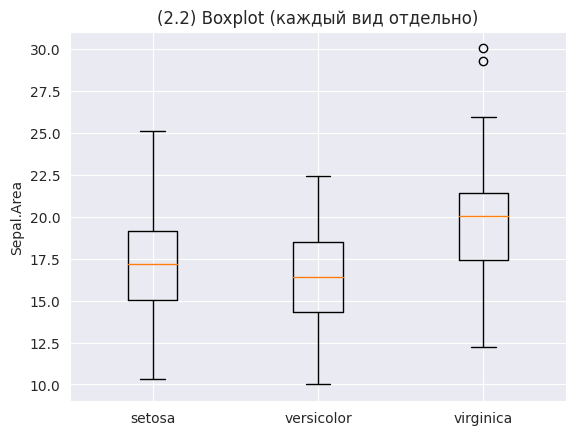

In [15]:
plt.boxplot(
    [dfPerSpecies[sp]['Sepal.Area'] for sp in species], 
    labels=species)
plt.title('(2.2) Boxplot (каждый вид отдельно)')
plt.ylabel('Sepal.Area')
plt.show()

## Графики ЭПФ
- https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_index.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

In [16]:
# empirical cdf
def ecdf(series: pd.Series):
    '''
        Take time series and make a ecdf for its values (indices don't matter)
    '''
    return series.value_counts().sort_index().cumsum() / len(series)

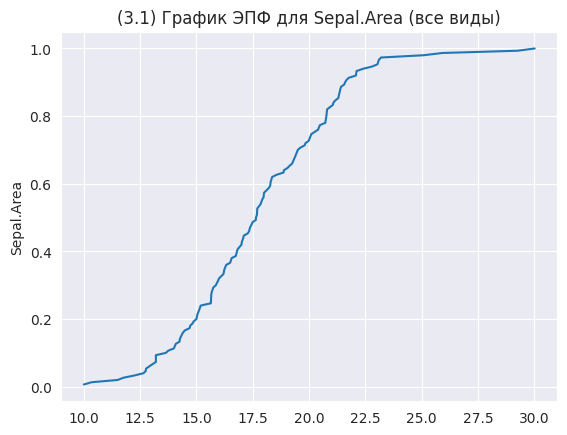

In [17]:
plt.title('(3.1) График ЭПФ для Sepal.Area (все виды)')
plt.ylabel('Sepal.Area')
plt.plot(ecdf(df['Sepal.Area']))
plt.show()

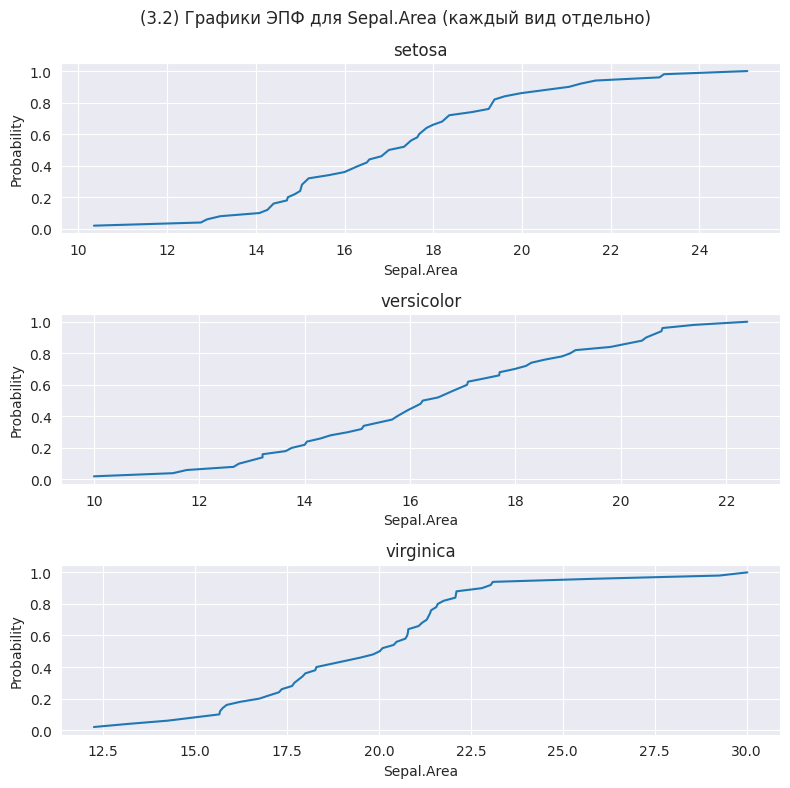

In [18]:
fig, axs = plt.subplots(len(species), figsize=(8,8))
fig.suptitle('(3.2) Графики ЭПФ для Sepal.Area (каждый вид отдельно)')
for sp, ax in zip(species, axs):
    ax.plot(ecdf(dfPerSpecies[sp]['Sepal.Area']))
    ax.set_title(sp)
    ax.set_xlabel('Sepal.Area')
    ax.set_ylabel('Probability')
fig.tight_layout()
plt.show()